<a href="https://colab.research.google.com/github/Rovlad/test/blob/main/CP_system_remaining_life_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
i1=1*10**-3 # final current density A/m2 for the coated section (add + 0.2mA/m2 per degre)
i2=107*10**-3 # final current density A/m2 for the bare steel (add 0.2mA/m2 per degre) from DNV RP B401, sub tropical, <100m depth
p=0.0345 # percentage of the exposed area at the start of calcs
A = 60964 # area of pipe to be protected (m2)
utilisation=0.8 # anodes utilisation factor
anode_capacity = 1600 # electrochemical capacity (A.h/kg)
anodesmassleft = 0.50*69600 # number of anodes left at time of last inspection (kg) (average depletion observed on the segment x original anode mass)

def remlife (area, anodesmassleft, p): # function for calculating a CP remaining life 
  count=0
  capacity=anodesmassleft*anode_capacity*utilisation # as per DNV RP B401 Total capacity (A.h) = total left mass of anode (kg) x utilisation x electroch.capacity (A.h/kg)
  while capacity >0:
    I=area*(i1*(1-p)+i2*p) # final current demand (A) including consumption of bare and coated pipe
    capacity=capacity - I*30*24 # original capacity - capacity lost per month (A.h)
    p=p+p*0.0003/12 # increase of coating breakdown per month 
    count+=1
  return count 

remlife (A, anodesmassleft, p)/12 # total remaining life in years

18.166666666666668

6.131783333333334 3.915537921982566 1.108122705675384


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


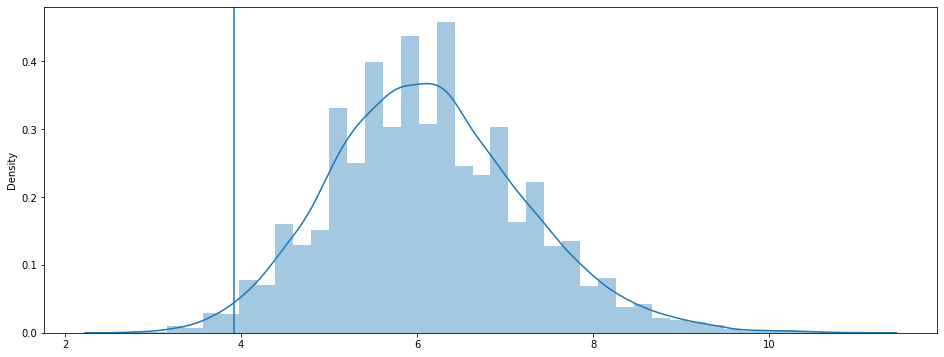

In [ ]:
yearsleft = []
anodes_initial = 69600 # intial weight of the anodes (kg)
area = 60964 # total area of the pipeline segment (m2)
coating_avg=0.11 # average exposed area by the end of the design life
f1=0.15 # coef to define 1 standard deviation
coating_stddev=coating_avg*f1
anodes_wastage_average=0.5
anodes_wastage_stndev=anodes_wastage_average*f1
for i in range (10000):
  p = np.random.normal(coating_avg, coating_stddev, 1)[0]
  anodesleft = anodes_initial - anodes_initial*np.random.normal(anodes_wastage_average, anodes_wastage_stndev, 1)[0]
  yearsleft.append (remlife(area, anodesleft, p)/12)

newar = np.array (yearsleft)
conf = newar.mean() - 2*newar.std()
print (newar.mean (), conf, newar.std())
plt.figure(figsize=(16, 6))
plt.axvline(conf, 0, 1)
sns.distplot (yearsleft, bins=40)